<a href="https://colab.research.google.com/github/YunSeoHwan/DNN_Base/blob/main/CH04/Gradient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loss Function**

## **SSE**

In [ ]:
import numpy as np

In [ ]:
# MSE 함수 구현
def mean_squared_error(y, t):
   return 0.5 * np.sum((y - t)**2)

In [ ]:
# 정답은 '2' -> one-hot
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# ex1) : '2'일 확률이 가장 높다고 추정함(0.6) -> softmax 결과값
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print('MSE of ex1 =', mean_squared_error(np.array(y), np.array(t)))

# ex2) : '7'일 확률이 가장 높다고 추정함(0.6)
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print('MSE of ex2 =', mean_squared_error(np.array(y), np.array(t)))

MSE of ex1 = 0.09750000000000003
MSE of ex2 = 0.5975


## **Cross Entropy**

In [ ]:
def cross_entropy_error(y, t):
    delta = 1e-7    # log0 방지
    return -np.sum(t * np.log(y + delta))

In [ ]:
# answer = 2
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# answer
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
mse_answer = cross_entropy_error(np.array(y), np.array(t))
print(f"Answer : {mse_answer}")

# error
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
mse_error = cross_entropy_error(np.array(y), np.array(t))
print(f"Error : {mse_error}")

Answer : 0.510825457099338
Error : 2.302584092994546


# **Mini Batch**

In [ ]:
import sys, os
sys.path.append('/content/drive/MyDrive/Colab Notebooks/DNN_base/dataset')
from mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=False)

print('x_train.shape :', x_train.shape) # image
print('t_train.shape :', t_train.shape) # label

x_train.shape : (60000, 784)
t_train.shape : (60000,)


In [ ]:
# 무작위 10개 추출
train_size = x_train.shape[0]
batch_size = 10

batch_mask = np.random.choice(train_size, batch_size)   # 60000개 중 10개만 추출

x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

print('batch_mask :', batch_mask)
print('x_batch.shape :', x_batch.shape)
print('t_batch.shape :', t_batch.shape)

batch_mask : [ 5651 48206  7316 23124 43701 28837 46731 46632 27684  3970]
x_batch.shape : (10, 784)
t_batch.shape : (10,)


## **Mini batch cross entropy**

In [ ]:
# One-hot
def cross_entropy_error(y, t):
   if y.ndim == 1:
       t = t.reshape(1, t.size)
       y = y.reshape(1, y.size)

   batch_size = y.shape[0]
   return -np.sum(t * np.log(y)) / batch_size

In [ ]:
# label
def cross_entropy_error(y, t):
   if y.ndim == 1:
       t = t.reshape(1, t.size)
       y = y.reshape(1, y.size)

   batch_size = y.shape[0]
   return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size # y[0, t_1], y[1, t_2], ...

# **수치 미분**

## **미분(해석적)**

In [ ]:
def diff(f, x):
    h = 10e-50  # 너무 작은 값은 계산이 안됨 -> 1e-4가 적당하다고 알려짐
    return (f(x + h) - f(x)) / h

## **미분(수치적)**

In [1]:
def numerical_diff(f, x):
   h = 1e-4  # 0.0001
   return (f(x+h) - f(x-h)) / (2*h) # 오차를 줄이기 위한 차분

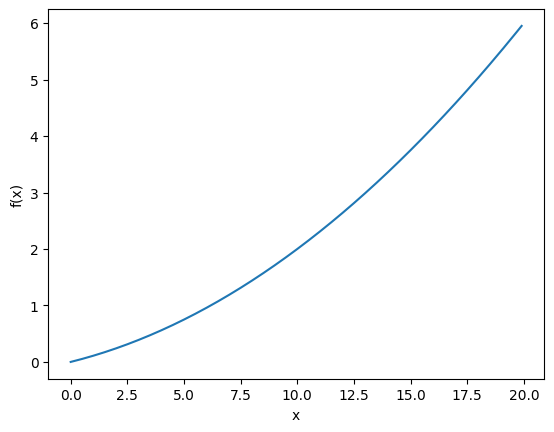

In [2]:
def func_1(x):
    return 0.01*x**2 + 0.1*x

import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.0, 20.0, 0.1)
y = func_1(x)

plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [6]:
# x = 5, 10 미분
print(numerical_diff(func_1, 5))    # real : 0.2
print(numerical_diff(func_1, 10))   # real : 0.3

0.1999999999990898
0.2999999999986347


## **편미분**

In [15]:
def func_2(x):
    return x[0] ** 2 + x[1] ** 2    # np,sum(x ** 2) 동일

# **Gradient**
모든 변수의 편미분을 벡터화 한 것

In [25]:
def func_2(x):
    return x[0] ** 2 + x[1] ** 2    # np,sum(x ** 2) 동일

def gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x) # x와 shape이 같은 배열 생성

    for idx in range(x.size):
        tmp_val = x[idx]

        # f(x+h)
        x[idx] = tmp_val + h
        fxh1 = f(x)

        # f(x-h)
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val

    return grad

print(gradient(func_2, np.array([3.0, 4.0])))
print(gradient(func_2, np.array([0.0, 2.0])))
print(gradient(func_2, np.array([3.0, 0.0])))

[6. 8.]
[0. 4.]
[6. 0.]


# **Gradient Descent**

In [34]:
def gradient_descent(f, init_x, lr=0.01, step_num = 100):
    x = init_x

    for i in range(step_num):
        grad = gradient(func_2, x)
        x -= lr * grad

    return x

In [43]:
# lr이 작을경우
init_x = np.array([-3.0, 4.0])
gradient_descent(func_2, init_x=init_x, lr = 1e-10, step_num=100)

(array([-2.99999994,  3.99999992]),
 array([[-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  3.99999999],
        [-3.        ,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999998,  3.99999998],
        [-2.99999998,  3.999

In [44]:
# lr이 적합할 경우
init_x = np.array([-3.0, 4.0])
gradient_descent(func_2, init_x=init_x, lr = 0.1, step_num=100)

(array([-6.11110793e-10,  8.14814391e-10]),
 array([[-3.00000000e+00,  4.00000000e+00],
        [-2.40000000e+00,  3.20000000e+00],
        [-1.92000000e+00,  2.56000000e+00],
        [-1.53600000e+00,  2.04800000e+00],
        [-1.22880000e+00,  1.63840000e+00],
        [-9.83040000e-01,  1.31072000e+00],
        [-7.86432000e-01,  1.04857600e+00],
        [-6.29145600e-01,  8.38860800e-01],
        [-5.03316480e-01,  6.71088640e-01],
        [-4.02653184e-01,  5.36870912e-01],
        [-3.22122547e-01,  4.29496730e-01],
        [-2.57698038e-01,  3.43597384e-01],
        [-2.06158430e-01,  2.74877907e-01],
        [-1.64926744e-01,  2.19902326e-01],
        [-1.31941395e-01,  1.75921860e-01],
        [-1.05553116e-01,  1.40737488e-01],
        [-8.44424930e-02,  1.12589991e-01],
        [-6.75539944e-02,  9.00719925e-02],
        [-5.40431955e-02,  7.20575940e-02],
        [-4.32345564e-02,  5.76460752e-02],
        [-3.45876451e-02,  4.61168602e-02],
        [-2.76701161e-02,  3.689

In [45]:
# lr이 클 경우
init_x = np.array([-3.0, 4.0])
gradient_descent(func_2, init_x=init_x, lr = 10.0, step_num=100)

(array([-2.58983747e+13, -1.29524862e+12]),
 array([[-3.00000000e+00,  4.00000000e+00],
        [ 5.70000000e+01, -7.60000000e+01],
        [-1.08300000e+03,  1.44400000e+03],
        [ 2.05770000e+04, -2.74360000e+04],
        [-3.90963008e+05,  5.21284002e+05],
        [ 7.42829664e+06, -9.90439654e+06],
        [-1.41137328e+08,  1.88183103e+08],
        [ 2.68126267e+09, -3.57501690e+09],
        [-5.09763373e+10,  6.79001831e+10],
        [ 9.45170863e+11, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.295